## Popularity of a Song

What determines the popularity of a song on Spotify? Lets find out using the provided data set which has the top 50 most listened songs in the world by Spotify.

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)          
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top50spotify2019/top50.csv


Lets load the csv and check to see if everything is correct.

In [56]:
df = pd.read_csv('../input/top50spotify2019/top50.csv',index_col=0, encoding='ISO-8859-1')
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### Data Information:

* **Track Name** - Name of the song including featured artists
* **Artist Name** - Name of the artist
* **Genre** - Genre of the song
* **Beats per Minute** - The tempo of the song.
* **Energy** - The energy of a song. The higher the value, the more energtic the song
* **Danceability** - The higher the value, the easier it is to dance to this song.
* **Loudness..dB..** - The higher the value, the louder the song.
* **Liveness** - The higher the value, the more likely the song is a live recording.
* **Valence** - The higher the value, the more positive mood for the song.
* **Length** - The duration of the song.
* **Acousticness** - The higher the value the more acoustic the song is.
* **Speechiness** - The higher the value the more spoken word the song contains.
* **Popularity** - The higher the value the more popular the song is.

In [57]:
df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


To understand the above table:
* **count** - how many non emtpy rows there are
* **mean** - the mean value of each column
* **std** - Standard Deviation Value of each column
* **min** - minimum value of the column
* **25%,50%, and 75%** - percentile of value for each column
* **max** - max value of the column


## Data Visualizations

### Artists
First lets take a look and see how many unique artists are in the top 50 Spotify list for 2019.

In [58]:
artist = df['Artist.Name'].nunique()
print(f'There are {artist} artists in the Spotify top 50.')

There are 38 artists in the Spotify top 50.


So it seems that there are 12 artists that have multiple songs in the top 50 list for 2019. Lets find out who they are in the following bar graph.

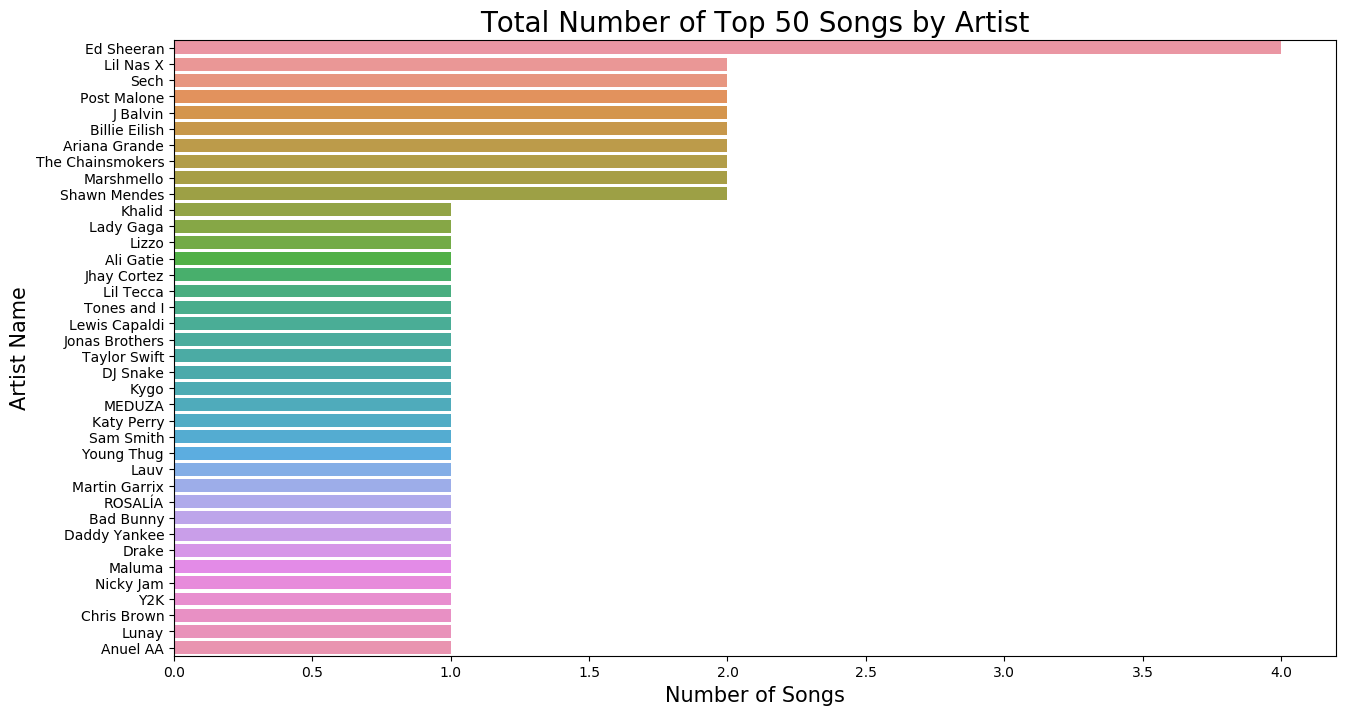

In [59]:
top = pd.DataFrame(df['Artist.Name'].value_counts().reset_index().rename(columns = {'index' : 'Artist Name'}))
top.rename(columns={'Artist.Name': 'Total'}, inplace=True)


plt.style.use('default')
plt.figure(figsize=(15,8))


p = sns.barplot(x=top['Total'], y=top['Artist Name'], linewidth=6)
p.axes.set_title("Total Number of Top 50 Songs by Artist",fontsize=20)
p.set_xlabel("Number of Songs",fontsize=15)
p.set_ylabel("Artist Name",fontsize=15)
p.tick_params(labelsize=10)

Ed Sheeran has 4 songs that made it to the top 50 which is the most by any artist of 2019. The other artists with multiple songs in the top 50 only have 2 tracks. This shows Ed Sheeran was very successful in 2019 on Spotify.

### Genre

Now that we've learned about the artists we should take a look at the genres that made it to the top 50.

In [60]:
genre = df['Genre'].nunique()
print(f'There are {genre} different genres in the Spotify top 50.')

There are 21 different genres in the Spotify top 50.


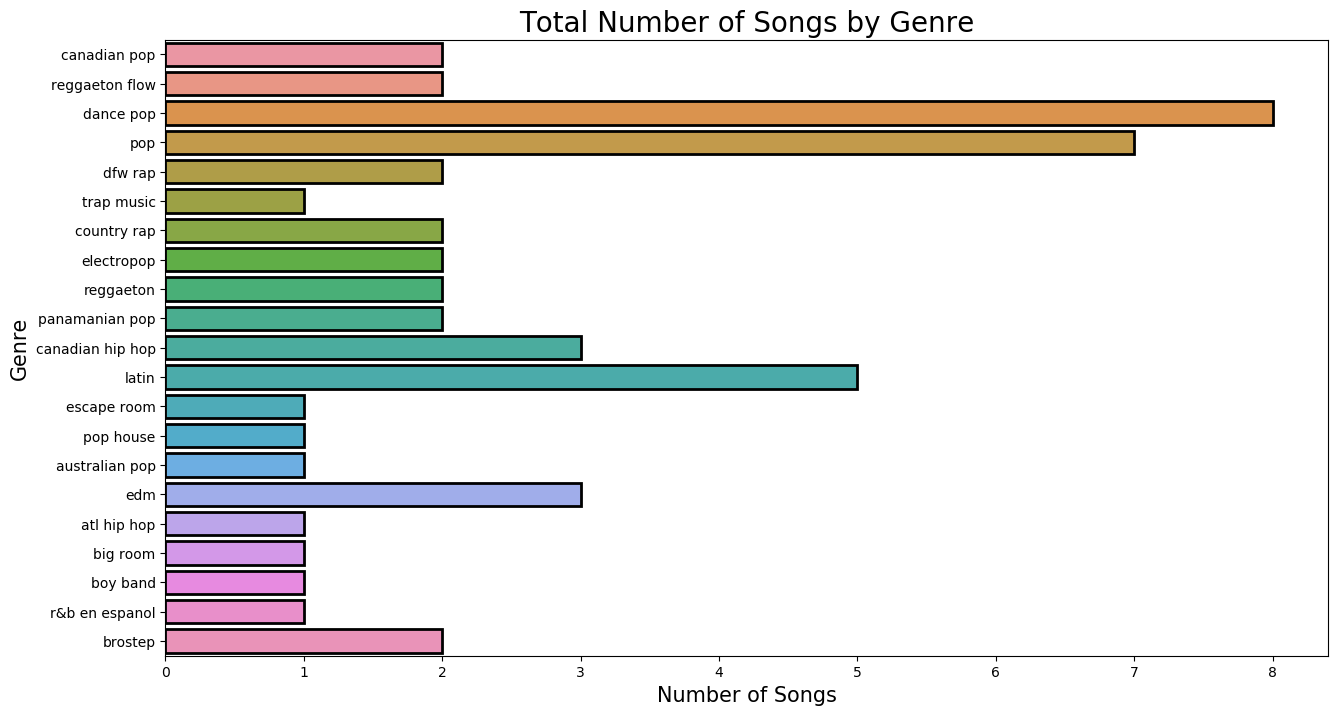

In [61]:
plt.style.use('default')
plt.figure(figsize=(15,8))
p = sns.countplot(y='Genre', data = df, linewidth=2, edgecolor='black')
p.axes.set_title("Total Number of Songs by Genre",fontsize=20)
p.set_xlabel("Number of Songs",fontsize=15)
p.set_ylabel("Genre",fontsize=15)
plt.show()

Here we see that the Pop genre is by far the most popular with Dance Pop being the clear winner within it. Latin is the most popular genre outside of the Pop genre with 5 songs. Canadian hip hop and edm are the other genres with more than 3 songs in the Top 50.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

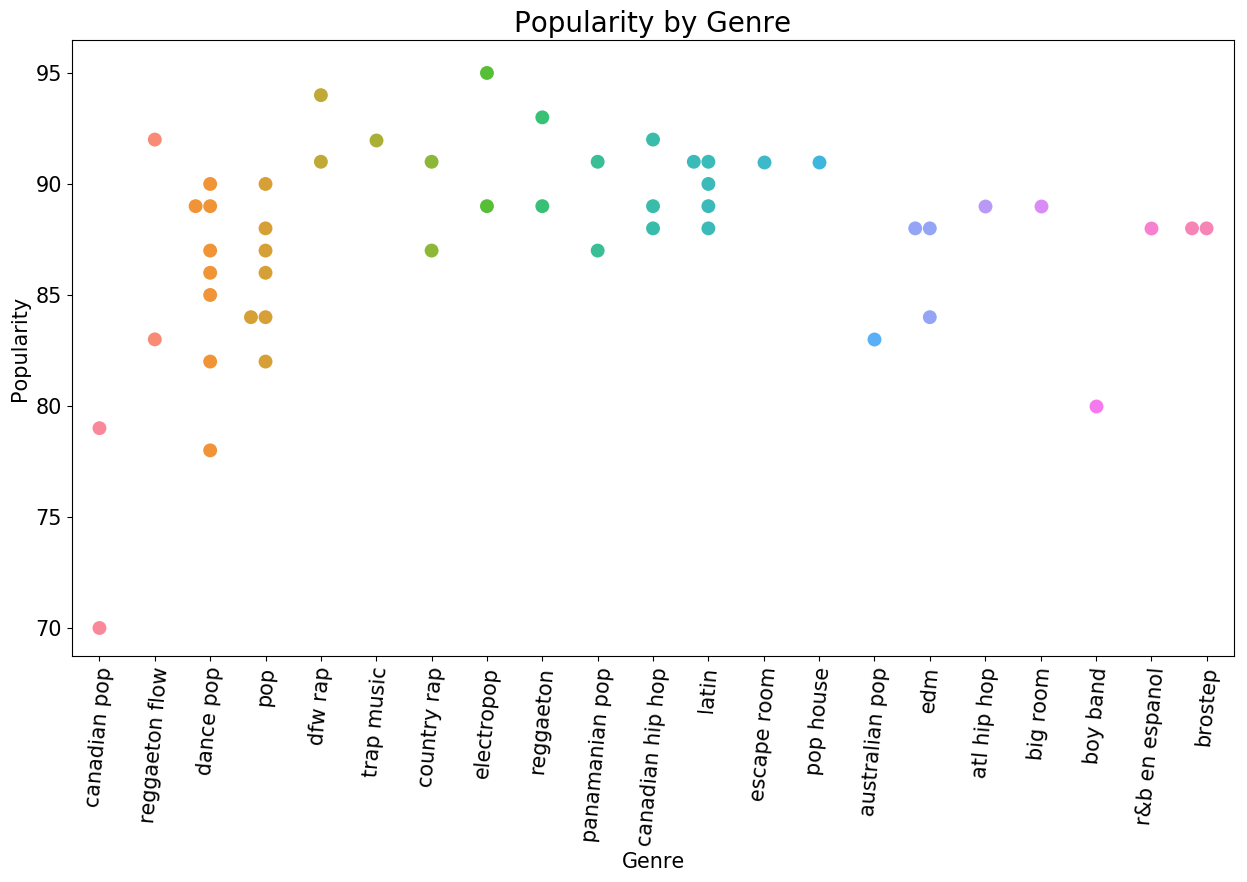

In [62]:
# set figure size
plt.style.use('default')
plt.figure(figsize=(15,8))

# Swarmplot
p = sns.swarmplot(x='Genre', y='Popularity', data=df, s=10)

p.axes.set_title("Popularity by Genre",fontsize=20)
p.set_xlabel("Genre",fontsize=15)
p.set_ylabel("Popularity",fontsize=15)
p.tick_params(labelsize=15)
plt.xticks(rotation=85)

Now we can see the score of each genre with respect to there popularity score. Although the dfw rap genre only has two songs it has a high popularity score for both. Similarly electrop has a song that has the highest popularity score compared to all other songs. Canadian pop has a song with lowest popularity score of about 70. Dance pop and pop have multiple songs in the top 50 but their songs average around the 87 mark with the highest only reach about 90. This tells us that although they are more likely to be popular, the popularity scores of these songs struggle to reach past 90.

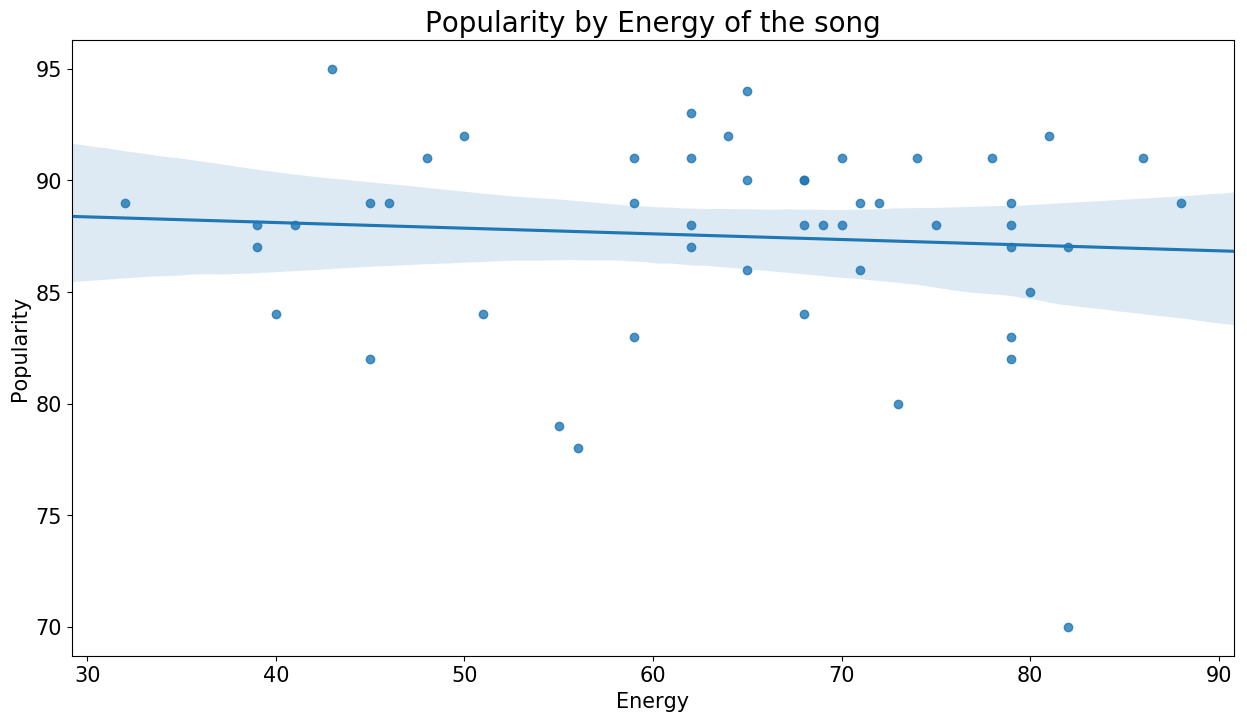

In [63]:
plt.style.use('default')
plt.figure(figsize=(15,8))
p = sns.regplot(x="Energy", y="Popularity", data=df)
p.axes.set_title("Popularity by Energy of the song",fontsize=20)
p.set_xlabel("Energy",fontsize=15)
p.set_ylabel("Popularity",fontsize=15)
p.tick_params(labelsize=15)


We can see a very slight decline as the energy of the song gets higher. This might suggest that songs with high energy points are not as popular as songs with lower energy scores.

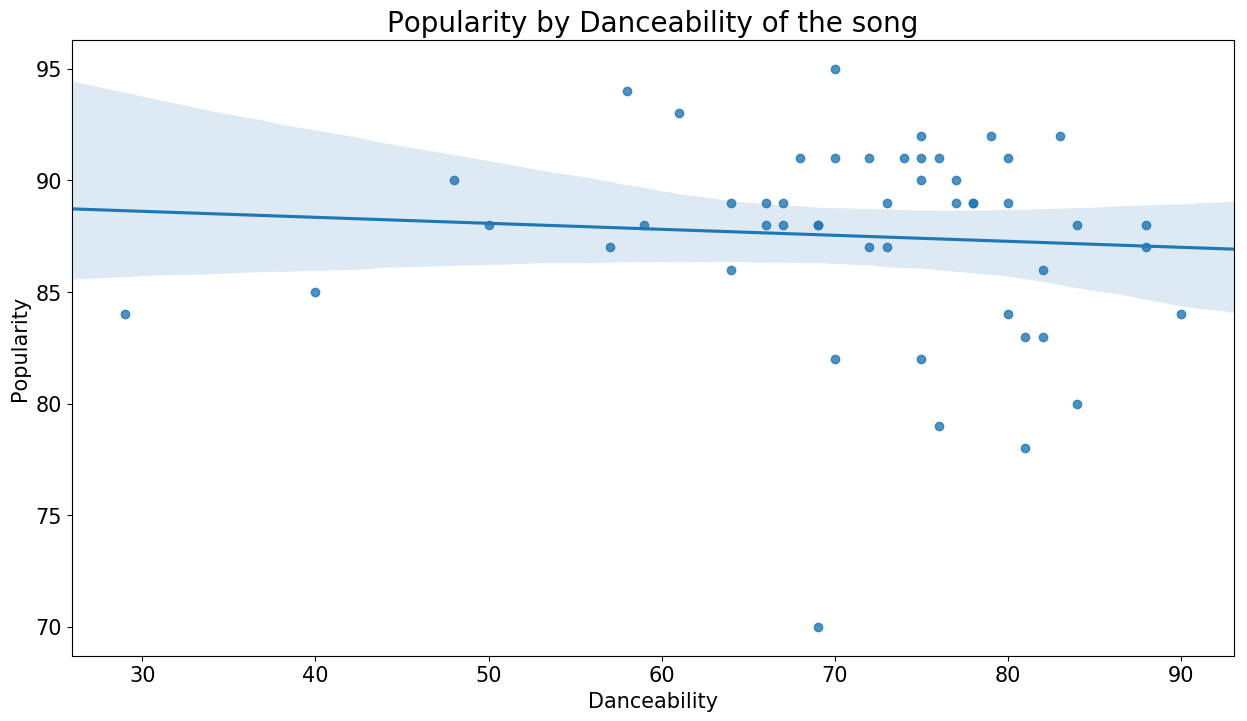

In [64]:
plt.style.use('default')

plt.figure(figsize=(15,8))
p = sns.regplot(x="Danceability", y="Popularity", data=df)
p.axes.set_title("Popularity by Danceability of the song",fontsize=20)
p.set_xlabel("Danceability",fontsize=15)
p.set_ylabel("Popularity",fontsize=15)
p.tick_params(labelsize=15)


Songs with moderately high danceability are more popular.

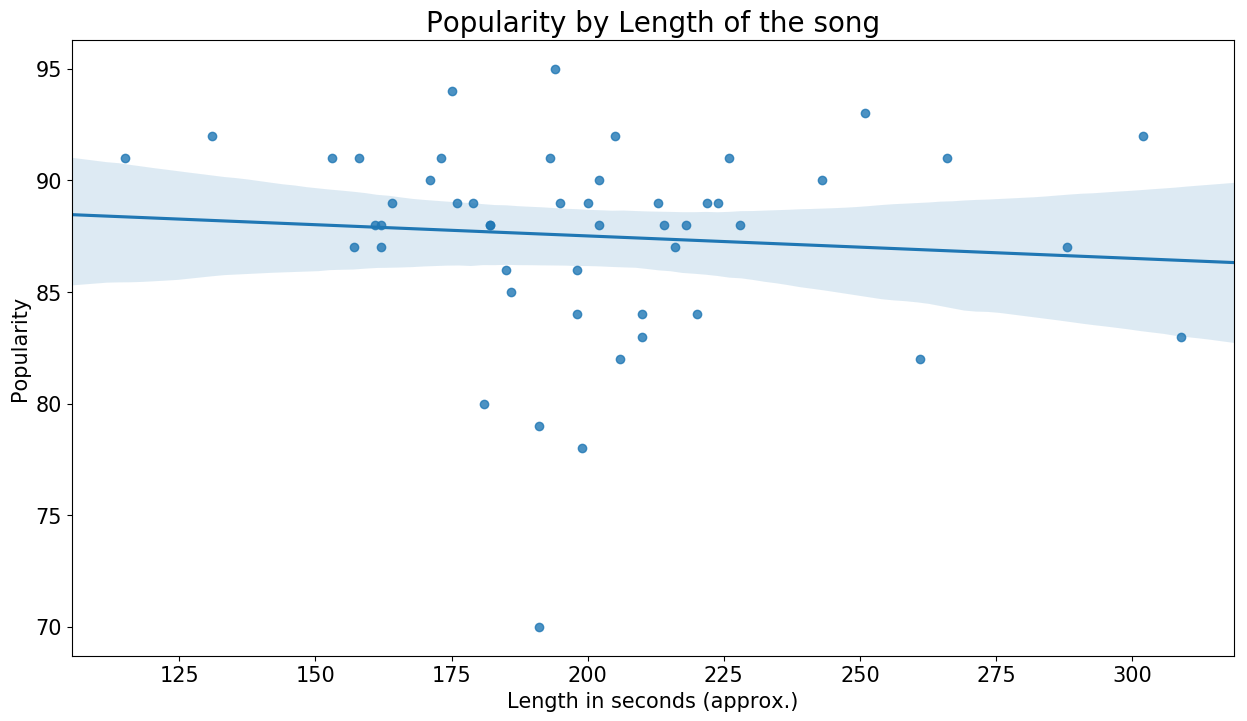

In [65]:
plt.style.use('default')

plt.figure(figsize=(15,8))
p = sns.regplot(x="Length.", y="Popularity", data=df)
p.axes.set_title("Popularity by Length of the song",fontsize=20)
p.set_xlabel("Length in seconds (approx.)",fontsize=15)
p.set_ylabel("Popularity",fontsize=15)
p.tick_params(labelsize=15)

Popular songs tend to last around 200 seconds. The longer the length, the less popular it becomes based on the regression line.